## Create a merged file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory where the CSV files are stored
directory_path = 'data'

# Delete old merged_result.csv file
if os.path.exists(directory_path + '/merged.csv'):
    os.remove(directory_path + '/merged.csv')
    print("Cleared merged.csv file")

# Merge all CSV files in the directory
def merge_all_csv_files(directory):
    all_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    merged_df = pd.concat([pd.read_csv(os.path.join(directory, file), sep=';') for file in all_files])
    return merged_df

merged_df = merge_all_csv_files(directory_path)

# Filter the DataFrame to only include rows where 'Role' column is 'User'
merged_df = merged_df[merged_df['Role'] == 'User']


# Save the merged dataframe to a new CSV file
merged_df.to_csv(os.path.join(directory_path, 'merged.csv'), index=False, sep=';')
print("The files were successfully merged: 'merged.csv'.")


The files were successfully merged: 'merged.csv'.


Debugging Help: 5
Code Snippet: 8
Conceptual Questions: 0
Complete Solution: 2
Multiple Choice (Quiz): 0
Student correction: 1
Language change: 0
Uncategorized: 4
Records --->>>>>: 29
Debugging Help: 17.24%
Code Snippet: 27.59%
Conceptual Question: 0.00%
Complete Solution: 6.90%
Multiple Choice: 0.00%
Students Correction: 3.45%
Language Change: 0.00%
Uncategorized: 13.79%


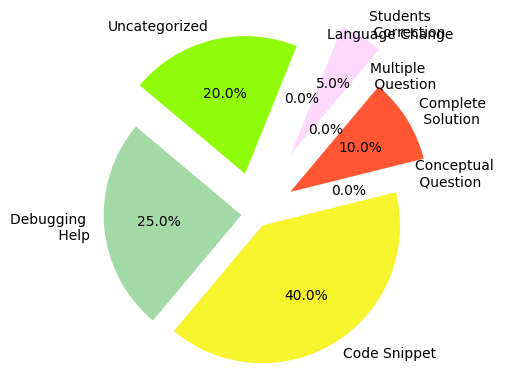

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the merged CSV file into a DataFrame
merged_df = pd.read_csv('data/merged.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
merged_df['Datetime'] = pd.to_datetime(merged_df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Counts Debugging Help
debugging_help = merged_df[merged_df['Classification'] == 'Debugging Help'].shape[0]
print(f"Debugging Help: {debugging_help}")

# Counts Code Snippet
code_snippet = merged_df[merged_df['Classification'] == 'Code Snippet'].shape[0]
print(f"Code Snippet: {code_snippet}")

# Counts Conceptual Questions
conceptual_questions = merged_df[merged_df['Classification'] == 'Conceptual Questions'].shape[0]
print(f"Conceptual Questions: {conceptual_questions}")

# Counts Complete Solution
complete_solution = merged_df[merged_df['Classification'] == 'Complete Solution'].shape[0]
print(f"Complete Solution: {complete_solution}")

# Counts Multiple Question Exercise
multiple_question_exercise = merged_df[merged_df['Classification'] == 'Multiple Question Exercise'].shape[0]
print(f"Multiple Choice (Quiz): {multiple_question_exercise}")

# Counts Student correction
student_correction = merged_df[merged_df['Classification'] == 'Student Correction'].shape[0]
print(f"Student correction: {student_correction}")

# Counts Language change
language_change = merged_df[merged_df['Classification'] == 'Language change'].shape[0]
print(f"Language change: {language_change}")

# Counts Uncategorized
uncategorized = merged_df[merged_df['Classification'] == 'Uncategorized'].shape[0]
print(f"Uncategorized: {uncategorized}")

# Total of records in the Classification column
total = merged_df['Classification'].count()

print(f"Records --->>>>>: {total}")

# Calculates the percentage of each classification
debugging_help_percentage = (debugging_help / total) * 100
code_snippet_percentage = (code_snippet / total) * 100
conceptual_questions_percentage = (conceptual_questions / total) * 100
complete_solution_percentage = (complete_solution / total) * 100
multiple_question_exercise_percentage = (multiple_question_exercise / total) * 100
student_correction_percentage = (student_correction / total) * 100
language_change_percentage = (language_change / total) * 100
uncategorized_percentage = (uncategorized / total) * 100

print(f"Debugging Help: {debugging_help_percentage:.2f}%")
print(f"Code Snippet: {code_snippet_percentage:.2f}%")
print(f"Conceptual Question: {conceptual_questions_percentage:.2f}%")
print(f"Complete Solution: {complete_solution_percentage:.2f}%")
print(f"Multiple Choice: {multiple_question_exercise_percentage:.2f}%")
print(f"Students Correction: {student_correction_percentage:.2f}%")
print(f"Language Change: {language_change_percentage:.2f}%")
print(f"Uncategorized: {uncategorized_percentage:.2f}%")

# Update font size
plt.rcParams.update({'font.size': 10})

labels = ['Debugging \n Help', 'Code Snippet', 'Conceptual \n Question', 'Complete \n Solution', 'Multiple \n Question',
          'Students \n Correction', 'Language Change', 'Uncategorized']
sizes = [debugging_help_percentage, code_snippet_percentage, conceptual_questions_percentage, complete_solution_percentage,
         multiple_question_exercise_percentage, student_correction_percentage, language_change_percentage, uncategorized_percentage]

# Colors
colors = ['#A3D9A5', '#F7F42D', '#79C7E3', '#FF5733', '#C70039', '#FED9FD', '#D3D3D3', '#91FC09']

# Space between all segments
explode = (0.1, 0.1, 0.1, 0.3, 0.2, 0.5, 0.3, 0.3)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Heat Map

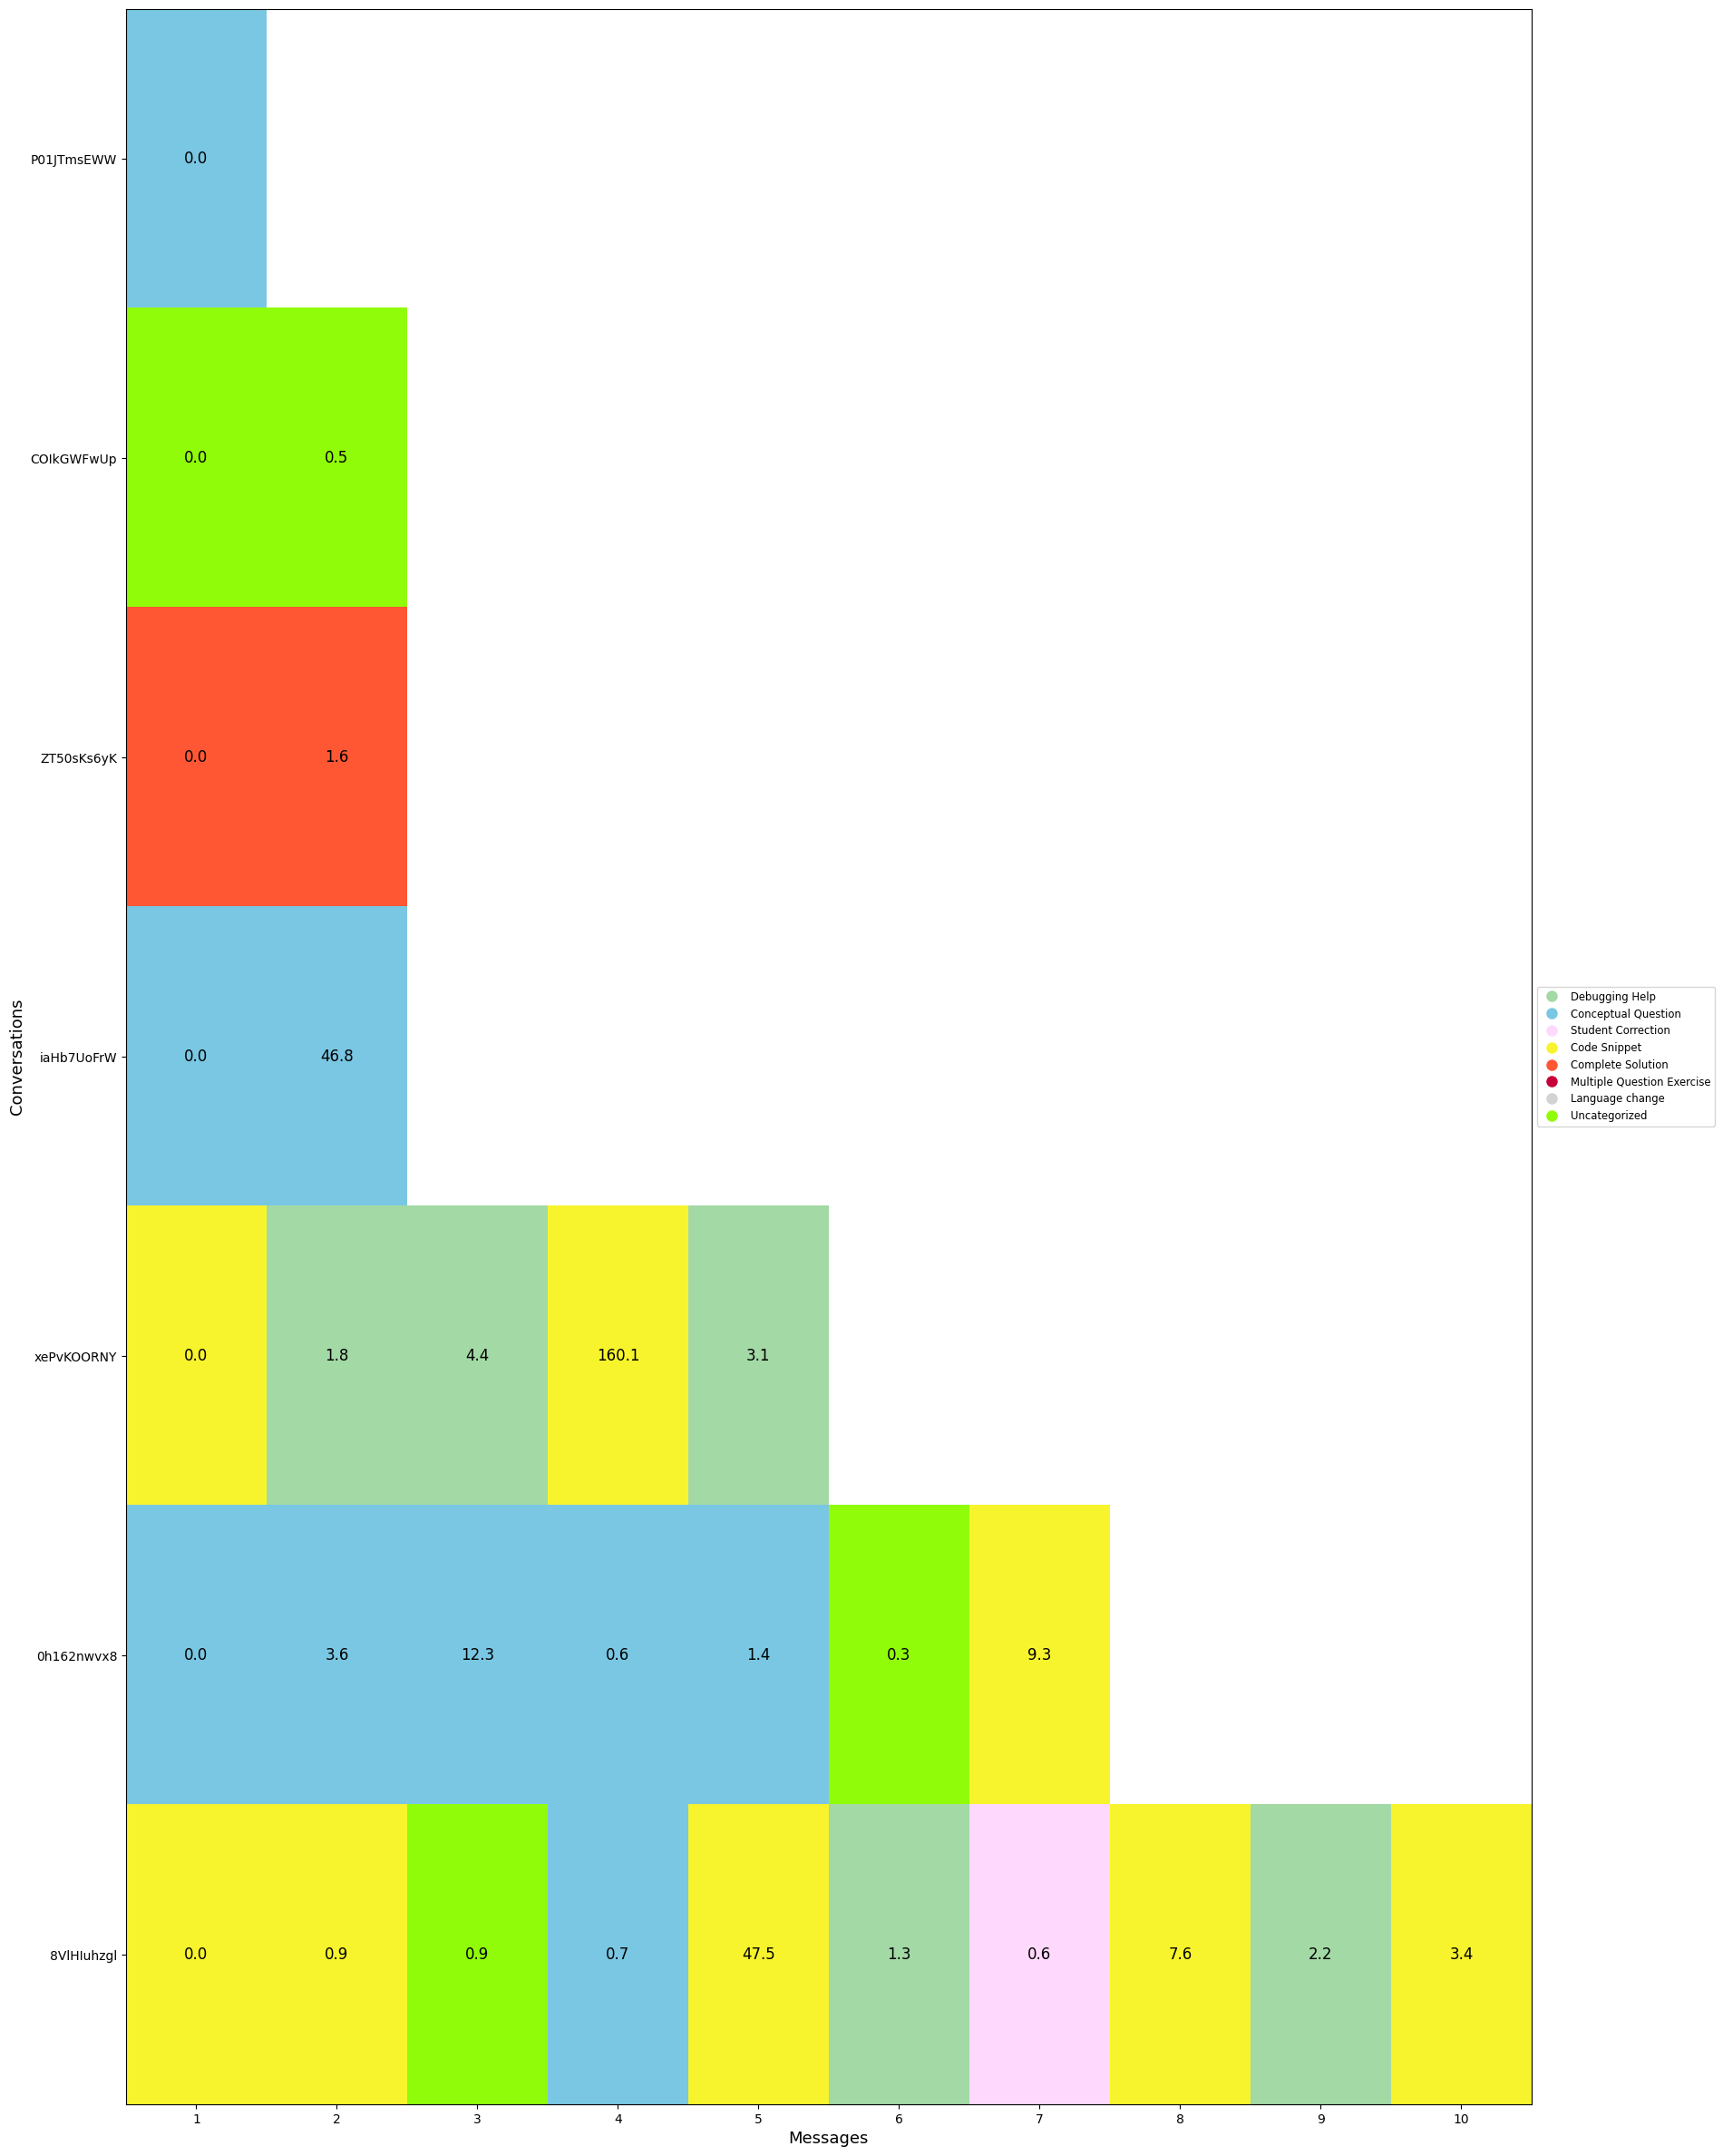

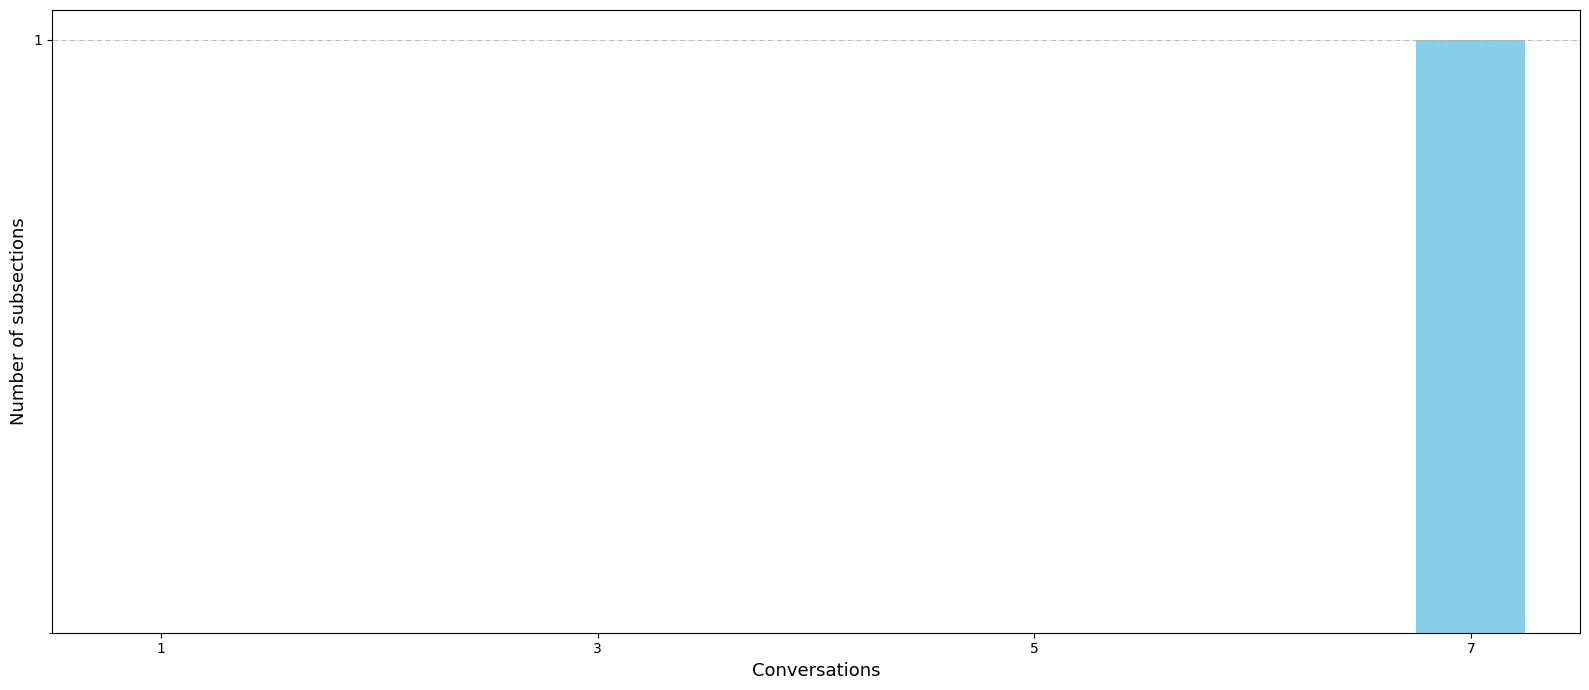

---------------- Spacing  -------------------
Number of messages longer than 60 minutes: 1
Percentage of messages longer than 60 minutes: 3.45%
Average number of messages longer than 60 minutes per conversation: 1.00
--
Number of conversations longer than 60 minutes: 1
Percentage of conversations longer than 60 minutes: 14.29%
---------------- Spacing  -------------------


In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to convert hex color codes to RGB format
def hex_to_rgb(hex_value):
    if isinstance(hex_value, float):
        return (255, 255, 255)  # Return white color for float values
    hex_value = hex_value.lstrip('#')  # Remove the hash symbol from the hex code
    return tuple(int(hex_value[i:i+2], 16) for i in (0, 2, 4))  # Convert hex to RGB tuple

# Create a dictionary to map classification labels to their respective color codes
classification_colors = {
    'Debugging Help': '#A3D9A5',
    'Conceptual Question': '#79C7E3',
    'Student Correction': '#FED9FD',
    'Code Snippet': '#F7F42D',
    'Complete Solution': '#FF5733',
    'Multiple Question Exercise': '#C70039',
    'Language change': '#D3D3D3',
    'Uncategorized': '#91FC09',
}

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/merged.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Map each 'Classification' in the DataFrame to its corresponding color using the dictionary
df['Color'] = df['Classification'].map(classification_colors)

# Truncate the 'Id' column to the first 10 characters
df['Id'] = df['Id'].str[:10]

# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M', errors='coerce')

# Sort data by 'Id' and 'Datetime' to ensure proper order
df = df.sort_values(by=['Id', 'Datetime'])

# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Save the modified DataFrame to a new CSV file
df.to_csv('data/heatmap.csv', index=False, sep=';')

# Find the maximum number of messages for any 'Id'
max_len = 0
for key in df['Id'].unique():
    if max_len < df[df['Id'] == key].shape[0]:
        max_len = df[df['Id'] == key].shape[0]

dic_colors = {}
dic_times = {}

# Populate the dictionary with {Id: [color1, color2, ..., colorN]} and time differences
for key in df['Id'].unique():
    row_colors = {key: [color for color in df[df['Id'] == key]['Color']]}
    row_times = {key: [round(time, 1) for time in df[df['Id'] == key]['TimeDeltaMinutes']]}  # Round to 1 decimal
    dic_colors.update(row_colors)
    dic_times.update(row_times)

# >>>>>>> Order dic_colors by number of messages in descending order
dic_colors = dict(sorted(dic_colors.items(), key=lambda x: len(x[1]), reverse=False))

# Fill the color list with white ('#FFFFFF') and time list with NaN to match the max length
for key in dic_colors.keys():
    dic_colors[key] = dic_colors[key] + ['#FFFFFF'] * (max_len - len(dic_colors[key]))
    dic_times[key] = dic_times[key] + [np.nan] * (max_len - len(dic_times[key]))

# Convert hex color values to RGB format for plotting
for key in dic_colors.keys():
    dic_colors[key] = [hex_to_rgb(color) for color in dic_colors[key]]

# >>>>>>> Uncomment to display the 15 first conversations
#dic_colors = dict(list(dic_colors.items())[:15])

# Plot the heatmap with time intervals in the cells
fig, ax = plt.subplots(figsize=(20, 30))  # Aumente o valor de figsize conforme necessário

# Set axis labels
ax.set_xlabel('Messages', fontsize=13)
ax.set_ylabel('Conversations', fontsize=13)

# Set ticks for the x-axis and y-axis
ax.set_xticks(range(max_len))
ax.set_xticklabels(range(1, max_len + 1))  # Definir o rótulo para começar em 1

ax.set_yticks(range(len(dic_colors)))
ax.set_yticklabels(range(1, len(dic_colors) + 1))

# >>>>>>> Uncomment to show the 'Id' values on the y-axis
ax.set_yticklabels(dic_colors.keys())

# Display the heatmap using the list of RGB color values
heatmap = ax.imshow(list(dic_colors.values()), aspect='auto')

# >>>>>>> Annotate each cell with the time delta in minutes, and use a smaller font size
for i, key in enumerate(dic_colors.keys()):
    for j, time in enumerate(dic_times[key]):
        if not np.isnan(time):  # Annotate only if time is not NaN
            ax.text(j, i, f'{time:.1f}', ha='center', va='center', color='black', fontsize=12)  # Small font

# Create a legend with classification labels and their respective colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label)
                   for label, color in classification_colors.items()]

# Position the legend on the right side of the plot with a larger font size
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), title='', fontsize='small')

# Show the heatmap plot
plt.show()

# ####################


# Count in each record of the dataframe how many messages are longer than 60 minutes and store in a new column
df['Subsessions'] = df.groupby('Id')['TimeDeltaMinutes'].transform(lambda x: (x > 60).sum())

# Save the modified DataFrame to a new CSV file
df.to_csv('data/subsessions.csv', index=False, sep=';')

# Plot the number of subsessions for each conversation
fig, ax = plt.subplots(figsize=(16,7))

# Count the number of subsessions for each conversation
subsessions_count = df.groupby('Id')['Subsessions'].max()

# Plot the bar chart
subsessions_count.plot(kind='bar', ax=ax, color='skyblue')

# Set axis labels and title
ax.set_xlabel('Conversations', fontsize=13)
ax.set_ylabel('Number of subsections', fontsize=13)
#ax.set_title('Number of subsessions per conversation', fontsize=13)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=10)  # Set the font size of x-axis labels to be smaller

# Adjust x-axis to show 1 to N
ax.set_xticks(range(len(subsessions_count)))
ax.set_xticklabels(range(1, len(subsessions_count) + 1))

# Show only odd numbers on the x-axis
ax.set_xticks([i for i in range(len(subsessions_count)) if (i + 1) % 2 != 0])
ax.set_xticklabels([i + 1 for i in range(len(subsessions_count)) if (i + 1) % 2 != 0])

# Set y-axis to have a more precise scale with more subdivisions
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='lower'))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax.grid(which='both', axis='y', linestyle='-.', linewidth=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# ####################

print("---------------- Spacing  -------------------")
# Count the number of messages with delta time greater than 60 minutes
messages_long_hour = df[df['TimeDeltaMinutes'] > 60].shape[0]
# % of messages longer than 60 minutes
# Count the number of conversation with delta time greater than 60 minutes
conversations_long_hour = df[df['TimeDeltaMinutes'] > 60]['Id'].nunique()

percentage_long_hour = (messages_long_hour / df.shape[0]) * 100
print(f"Number of messages longer than 60 minutes: {messages_long_hour}")
print(f"Percentage of messages longer than 60 minutes: {percentage_long_hour:.2f}%")

# Average number of messages longer than 60 minutes per conversation
average_messages_long_hour_per_conversation = messages_long_hour / conversations_long_hour
print(f"Average number of messages longer than 60 minutes per conversation: {average_messages_long_hour_per_conversation:.2f}")

print("--")

# % of conversation longer than 60 minutes
percentage_conversations_long_hour = (conversations_long_hour / df['Id'].nunique()) * 100
print(f"Number of conversations longer than 60 minutes: {conversations_long_hour}")
print(f"Percentage of conversations longer than 60 minutes: {percentage_conversations_long_hour:.2f}%")
print("---------------- Spacing  -------------------")



## General data and categories spacing

Number of conversations: 7
Number of messages: 29
Average number of messages per conversation: 4.14
>>>>>>>> Messages with time greater than 60 minutes were removed.
***** Pearson *****
Total conversations: 7
Not ignored conversations: 7
Ignored conversations: 0
Percentual of ignored conversations: 0.00%
***** Pearson *****
Standard deviation for each classification:
Debugging Help: 0.00 minutes
Conceptual Questions: nan minutes
Student Correction: 0.00 minutes
Code Snippet: 0.00 minutes
Complete Solution: 0.00 minutes
Multiple Question: nan minutes
Language Change: nan minutes
Uncategorized: 0.00 minutes


/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/_core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/_core/_methods.py:219: Runtime

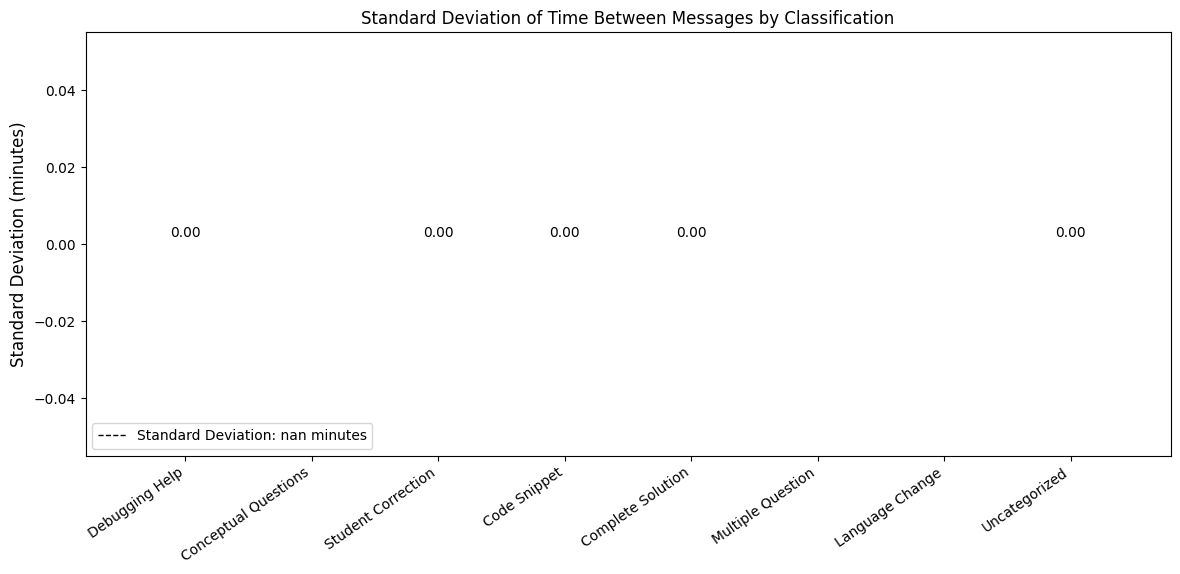

/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


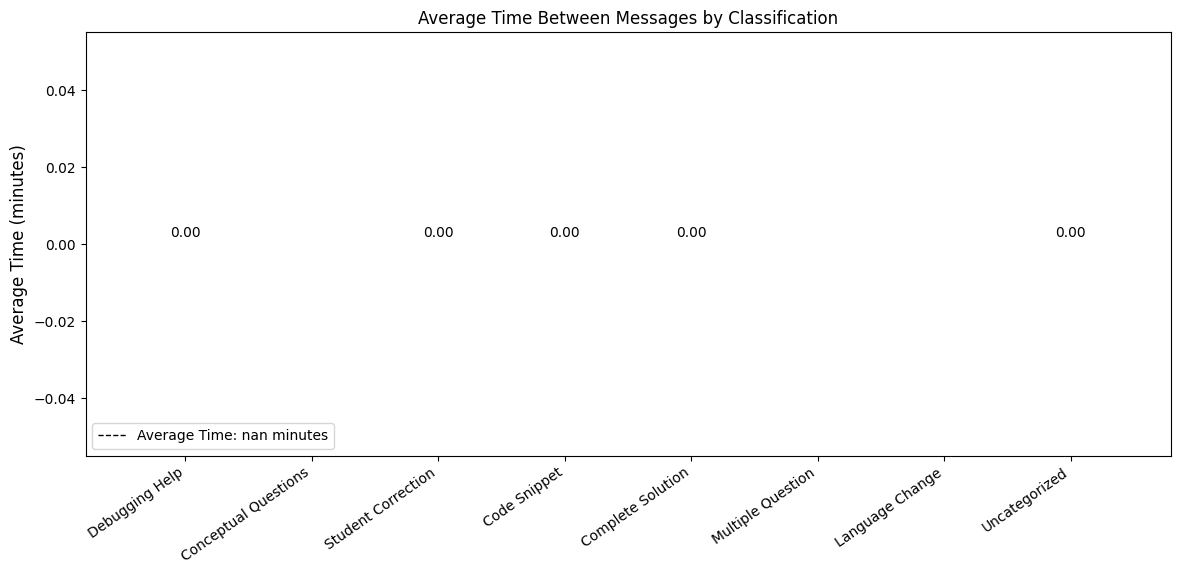

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the merged CSV file into a DataFrame
df = pd.read_csv('data/heatmap.csv', sep=';')

# Convert 'Datetime' column to datetime using the correct format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%H:%M:%S - %d/%m/%Y', errors='coerce')

# Truncate the 'Id' column to the first 10 characters
df['Id'] = df['Id'].str[:10]

# Sort data by 'Id' and 'Datetime' to ensure proper order
df = df.sort_values(by=['Id', 'Datetime'])

# Number of conversations
unique_students = df['Id'].nunique()
print(f'Number of conversations: {unique_students}')

# Number of student messages
unique_messages = df.shape[0]
print(f'Number of messages: {unique_messages}')

# Average number of messages per conversation
avg_messages_per_student = unique_messages / unique_students
print(f'Average number of messages per conversation: {avg_messages_per_student:.2f}')

# For each classification, calculate the average time between the next message
# Calculate time differences between each message for each user
df['TimeDelta'] = df.groupby('Id')['Datetime'].diff().fillna(pd.Timedelta(seconds=0))
df['TimeDeltaMinutes'] = df['TimeDelta'].dt.total_seconds() / 60  # Convert to minutes

# Code Snippet time
code_snippet_time = []
# Debugging Help time
debugging_help_time = []
# Conceptual Questions time
conceptual_questions_time = []
# Student Correction time
student_correction_time = []
# Complete Solution time
complete_solution_time = []
# Multiple Question Exercise time
multiple_question_exercise_time = []
# Language change time
language_change_time = []
# Uncategorized time
uncategorized_time = []

count_time_hour = 0
count_time_day = 0

ignored = 0
not_ignored = 0

for key in df['Id'].unique():
	# Pega a conversa inteira desse Id e redefine os índices
	conversation = df[df['Id'] == key].sort_values(by='Datetime').reset_index(drop=True)

	# Calculate the autocorrelation of the time deltas
	time_delta = conversation['TimeDeltaMinutes']

	try:
		# If time_delta greater than 2 elements
		if len(time_delta) > 2:
			auto_corr = time_delta.autocorr()
			#print(f'Pearson for {key}: {auto_corr:.2f}')
		else:
			# If the conversation has less than 2 elements, set auto_corr to NaN
			# and it will not be ignored
			auto_corr = float('nan')
	except (Exception, e):
		auto_corr = 10 # eliminates

	if (-0.3 <= auto_corr <= 0.3) or (np.isnan(auto_corr)):
		not_ignored = not_ignored + 1
		# Loop over the conversation
		for index, message in conversation.iterrows():
			if message['Classification'] == 'Code Snippet':
				# Check if there is a next row
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					code_snippet_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Debugging Help':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					debugging_help_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Conceptual Questions':
					if index + 1 < len(conversation):
						next_row = conversation.iloc[index + 1]
						conceptual_questions_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Student Correction':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					student_correction_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Complete Solution':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					complete_solution_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Multiple Question Exercise':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					multiple_question_exercise_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Language change':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					language_change_time.append(next_row['TimeDeltaMinutes'])
			elif message['Classification'] == 'Uncategorized':
				if index + 1 < len(conversation):
					next_row = conversation.iloc[index + 1]
					#print(key + " -- " + str(next_row['TimeDeltaMinutes']))
					uncategorized_time.append(next_row['TimeDeltaMinutes'])
	else:
		ignored = ignored + 1
		#print(f'Pearson for {key}: {auto_corr:.2f} - Conversation ignored')


# Remove messages with time greater than 60 minutes (due to subsessions)
print(">>>>>>>> Messages with time greater than 60 minutes were removed.")
debugging_help_time = [time for time in debugging_help_time if time < 60]
conceptual_questions_time = [time for time in conceptual_questions_time if time < 60]
student_correction_time = [time for time in student_correction_time if time < 60]
code_snippet_time = [time for time in code_snippet_time if time < 60]
complete_solution_time = [time for time in complete_solution_time if time < 60]
multiple_question_exercise_time = [time for time in multiple_question_exercise_time if time < 60]
language_change_time = [time for time in language_change_time if time < 60]
uncategorized_time = [time for time in uncategorized_time if time < 60]


print("***** Pearson *****")
print(f"Total conversations: {not_ignored + ignored}")
print(f"Not ignored conversations: {not_ignored}")
print(f"Ignored conversations: {ignored}")
print("Percentual of ignored conversations: {:.2f}%".format((ignored / (not_ignored + ignored)) * 100))
print("***** Pearson *****")

dict_time_classification = []
std_debugging_help_time = np.std(debugging_help_time)
dict_time_classification.append({'Classification': 'Debugging Help', 'Standard Deviation': std_debugging_help_time})

std_conceptual_questions_time = np.std(conceptual_questions_time)
dict_time_classification.append({'Classification': 'Conceptual Questions', 'Standard Deviation': std_conceptual_questions_time})

std_student_correction_time = np.std(student_correction_time)
dict_time_classification.append({'Classification': 'Student Correction', 'Standard Deviation': std_student_correction_time})

std_code_snippet_time = np.std(code_snippet_time)
dict_time_classification.append({'Classification': 'Code Snippet', 'Standard Deviation': std_code_snippet_time})

std_complete_solution_time = np.std(complete_solution_time)
dict_time_classification.append({'Classification': 'Complete Solution', 'Standard Deviation': std_complete_solution_time})

std_multiple_question_exercise_time = np.std(multiple_question_exercise_time)
dict_time_classification.append({'Classification': 'Multiple Question', 'Standard Deviation': std_multiple_question_exercise_time})

std_language_change_time = np.std(language_change_time)
dict_time_classification.append({'Classification': 'Language Change', 'Standard Deviation': std_language_change_time})

std_uncategorized_time = np.std(uncategorized_time)
dict_time_classification.append({'Classification': 'Uncategorized', 'Standard Deviation': std_uncategorized_time})

# order dict_time_classification by 'Standard Deviation'
dict_time_classification = sorted(dict_time_classification, key=lambda k: k['Standard Deviation'], reverse=False)

print("Standard deviation for each classification:")
for item in dict_time_classification:
	print(f"{item['Classification']}: {item['Standard Deviation']:.2f} minutes")

# Total standard deviation
total_std_time = (std_debugging_help_time + std_conceptual_questions_time + std_student_correction_time + std_code_snippet_time + std_complete_solution_time + std_multiple_question_exercise_time + std_language_change_time + std_uncategorized_time) / 8

classification_colors = {
	'Debugging Help': '#A3D9A5',
	'Conceptual Questions': '#79C7E3',
	'Student Correction': '#FED9FD',
	'Code Snippet': '#F7F42D',
	'Complete Solution': '#FF5733',
	'Multiple Question': '#C70039',
	'Language Change': '#D3D3D3',
	'Uncategorized': '#91FC09',
}

# Create a plot for dict_time_classification.
fig, ax = plt.subplots(figsize=(14, 5.5))
bars = ax.bar(
	[item['Classification'] for item in dict_time_classification],
	[item['Standard Deviation'] for item in dict_time_classification],
	color=[classification_colors[item['Classification']] for item in dict_time_classification]
)
ax.set_ylabel('Standard Deviation (minutes)', fontsize=12)
ax.set_title('Standard Deviation of Time Between Messages by Classification', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)  # Decrease font size and rotate x-axis labels

# Add a dashed line for the total standard deviation
ax.axhline(total_std_time, color='black', linestyle='--', linewidth=1, label=f'Standard Deviation: {total_std_time:.2f} minutes')
ax.legend()

# Add standard deviation values on top of each bar
for bar in bars:
	height = bar.get_height()
	ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()

# Create a plot for the average time between messages for each classification.
avg_time_classification = [
	{'Classification': 'Debugging Help', 'Average Time': np.mean(debugging_help_time)},
	{'Classification': 'Conceptual Questions', 'Average Time': np.mean(conceptual_questions_time)},
	{'Classification': 'Student Correction', 'Average Time': np.mean(student_correction_time)},
	{'Classification': 'Code Snippet', 'Average Time': np.mean(code_snippet_time)},
	{'Classification': 'Complete Solution', 'Average Time': np.mean(complete_solution_time)},
	{'Classification': 'Multiple Question', 'Average Time': np.mean(multiple_question_exercise_time)},
	{'Classification': 'Language Change', 'Average Time': np.mean(language_change_time)},
	{'Classification': 'Uncategorized', 'Average Time': np.mean(uncategorized_time)},
]

# Sort by average time
avg_time_classification = sorted(avg_time_classification, key=lambda k: k['Average Time'], reverse=False)

fig, ax = plt.subplots(figsize=(14, 5.5))
bars = ax.bar(
	[item['Classification'] for item in avg_time_classification],
	[item['Average Time'] for item in avg_time_classification],
	color=[classification_colors[item['Classification']] for item in avg_time_classification]
)
ax.set_ylabel('Average Time (minutes)', fontsize=12)
ax.set_title('Average Time Between Messages by Classification', fontsize=12)
plt.xticks(rotation=35, ha='right', fontsize=10)  # Decrease font size and rotate x-axis labels

# Add a dashed line for the total average time
total_avg_time = np.mean([item['Average Time'] for item in avg_time_classification])
ax.axhline(total_avg_time, color='black', linestyle='--', linewidth=1, label=f'Average Time: {total_avg_time:.2f} minutes')
ax.legend()

# Add average time values on top of each bar
for bar in bars:
	height = bar.get_height()
	ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.show()


## Test of AutoCorrelation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Read merged_result_heatmap_with_time.csv
df = pd.read_csv('data/heatmap.csv', delimiter=';')

# Loop through each conversation and calculate the AutoCorrelation for each TimeDeltaMinutes
for key in df['Id'].unique():
    conversation = df[df['Id'] == key].sort_values(by='Datetime').reset_index(drop=True)
    time_delta = conversation['TimeDeltaMinutes']
    auto_corr = time_delta.autocorr()
    print(f'Conversation: {key} - AutoCorrelation: {auto_corr}')



Conversation: 0h162nwvx8 - AutoCorrelation: -0.22945790581372777
Conversation: 8VlHIuhzgl - AutoCorrelation: -0.17092206464659676
Conversation: COIkGWFwUp - AutoCorrelation: nan
Conversation: P01JTmsEWW - AutoCorrelation: nan
Conversation: ZT50sKs6yK - AutoCorrelation: nan
Conversation: iaHb7UoFrW - AutoCorrelation: nan
Conversation: xePvKOORNY - AutoCorrelation: -0.3136405818202005


/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/rodrigo/dev/uc3m/uc3m/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
